Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/CNN_assignment.zip

Archive:  gdrive/My Drive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin c

### Data Reading/ Data Understanding
This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### dataset creation

Define some parameters for the loader:

In [6]:

batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## train dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size = batch_size,
                                                               image_size=(img_height,img_width),label_mode='categorical',
                                                               seed=123,subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## validation dataset 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size = batch_size,
                                                               image_size=(img_height,img_width),label_mode='categorical',
                                                               seed=123,subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### create a code to visualize one instance of all the nine classes present in the dataset

In [41]:
import matplotlib.pyplot as plt

In [61]:
#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
  files_path_dict[c]=list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
print(files_path_dict)



Found 2239 files belonging to 9 classes.
{'actinic keratosis': ['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031506.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030463.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025803.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030826.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029840.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026857.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031108.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030730.jpg', '/content/Skin c

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031506.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0030403.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0027107.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000311.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000475.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0028622.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0011132.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0029567.jpg']
['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

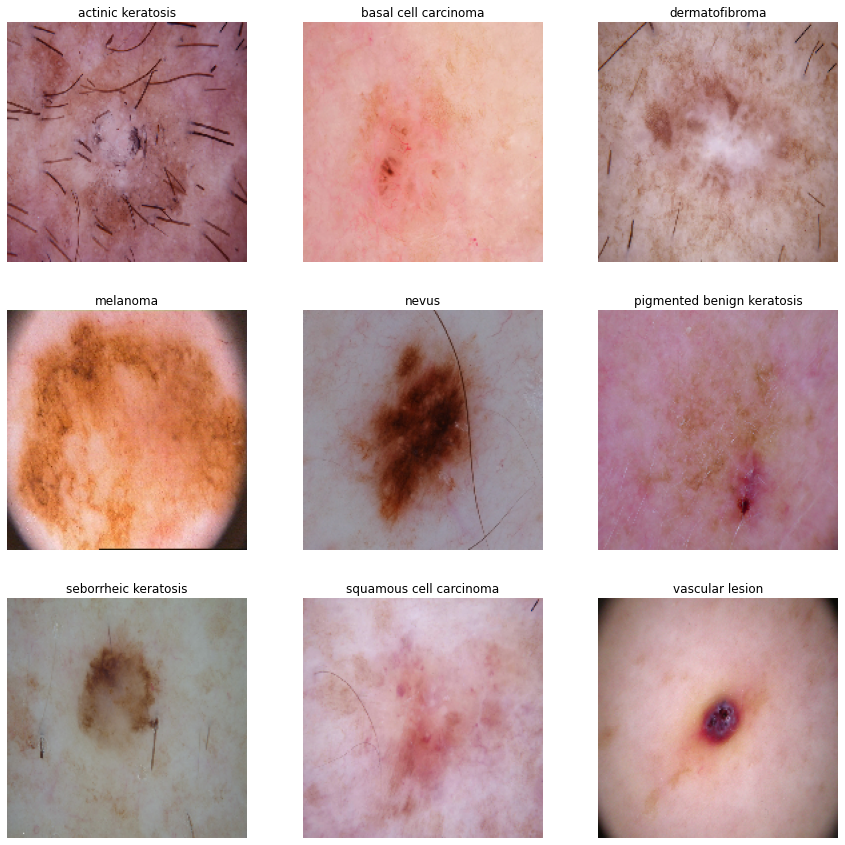

In [ ]:
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    print(path_list)
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

`tf.data.experimental.AUTOTUNE` defines appropriate number of processes that are free for working.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### CNN model architecture without using Dropout
model=Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#first Conv Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#second conv layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#third Conv Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten layer
model.add(layers.Flatten())

#dense layer
model.add(layers.Dense(512,activation='relu'))

#softmax
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 64)        36928     
                                                        

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 32s 131ms/step - loss: 2.0206 - accuracy: 0.2232 - val_loss: 1.9046 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 1.8715 - accuracy: 0.2807 - val_loss: 1.8505 - val_accuracy: 0.3154
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 1.7391 - accuracy: 0.3382 - val_loss: 1.6676 - val_accuracy: 0.3758
Epoch 4/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6211 - accuracy: 0.3973 - val_loss: 1.5716 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 1.5865 - accuracy: 0.4085 - val_loss: 1.5009 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5184 - accuracy: 0.4453 - val_loss: 1.4892 - val_accuracy: 0.4787
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 1.4571 - accuracy: 0.4643 - val_loss: 1.4265 - val_accuracy: 0.5034
Epoch 8/20


### Visualizing training results

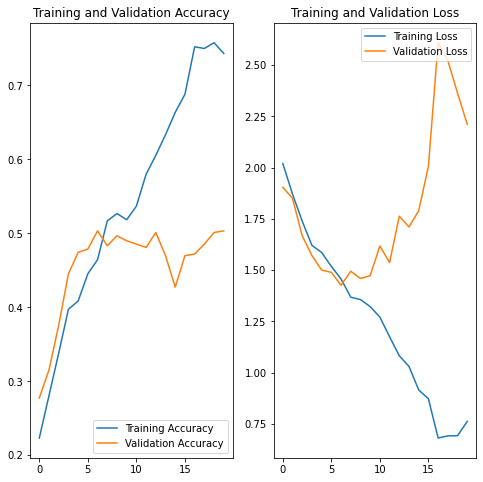

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- As can be seen, training accuracy is going higher but the validation accuracy is fluctuating and dropping with epochs.
- Also training loss decreases while validation loss increases.
- hence model is `overfitting`

In [15]:
# choose an appropriate data augumentation strategy. 
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training')


Found 1795 images belonging to 9 classes.


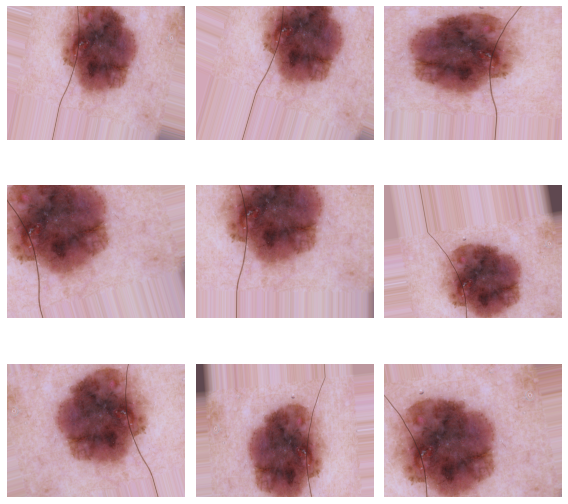

In [74]:
# visualize how your augmentation strategy works for one instance of training image.
from PIL import Image
img = Image.open("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000139.jpg")

# Convert the image to a numpy array
img_array = np.array(img)

# Reshape the array to have a batch size of 1
img_array = img_array.reshape((1,) + img_array.shape)

# Generate augmented images
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)
aug_iter = train_datagen.flow(img_array, batch_size=9)

# Plot the augmented images
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
axs = axs.flatten()

for img, ax in zip(aug_iter, axs):
    ax.imshow(img[0])
    ax.axis('off')

plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model

In [16]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# Increse the model size by adding another 32 layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 64 layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 128 layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)      

### Compiling the model

In [17]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [18]:
epochs = 20
history = model.fit_generator(
  train_generator,
  validation_data=val_ds,
  epochs=epochs,
)

<ipython-input-18-e69bd6bc0008>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
57/57 [==============================] - 47s 765ms/step - loss: 8.2694 - accuracy: 0.3198 - val_loss: 4.6214 - val_accuracy: 0.1499
Epoch 2/20
57/57 [==============================] - 45s 780ms/step - loss: 3.0272 - accuracy: 0.4162 - val_loss: 2.9012 - val_accuracy: 0.2058
Epoch 3/20
57/57 [==============================] - 42s 735ms/step - loss: 2.0979 - accuracy: 0.4201 - val_loss: 2.6664 - val_accuracy: 0.1544
Epoch 4/20
57/57 [==============================] - 43s 763ms/step - loss: 1.8544 - accuracy: 0.4513 - val_loss: 2.5731 - val_accuracy: 0.1767
Epoch 5/20
57/57 [==============================] - 44s 766ms/step - loss: 1.8239 - accuracy: 0.4368 - val_loss: 2.2999 - val_accuracy: 0.1946
Epoch 6/20
57/57 [==============================] - 44s 763ms/step - loss: 1.7152 - accuracy: 0.4841 - val_loss: 2.1084 - val_accuracy: 0.2595
Epoch 7/20
57/57 [==============================] - 44s 763ms/step - loss: 1.6560 - accuracy: 0.4880 - val_loss: 2.1449 - val_accuracy: 0.2662

### Visualizing the results

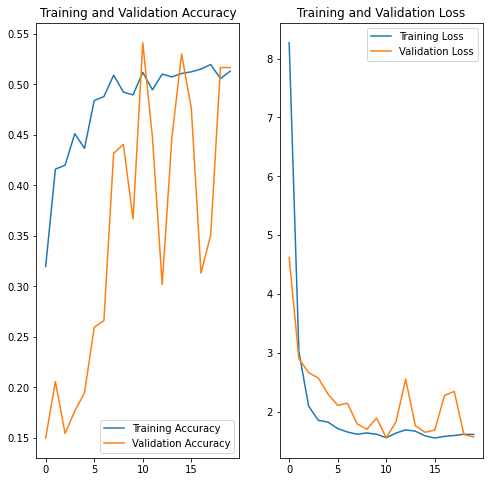

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- As can be seen, both the previous issues has been resolved.
  - training accuracy is going higher but the validation accuracy is fluctuating and dropping with epochs.`validation accuracy is also increasing now`
  - Also training loss decreases while validation loss increases.`validation loss is decreasing`

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [20]:
#Visualize distribution of classes in the training dataset.
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,nevus,357
1,dermatofibroma,95
2,seborrheic keratosis,77
3,basal cell carcinoma,376
4,squamous cell carcinoma,181
5,pigmented benign keratosis,462
6,actinic keratosis,114
7,vascular lesion,139
8,melanoma,438


<AxesSubplot:xlabel='No. of Image', ylabel='Class'>

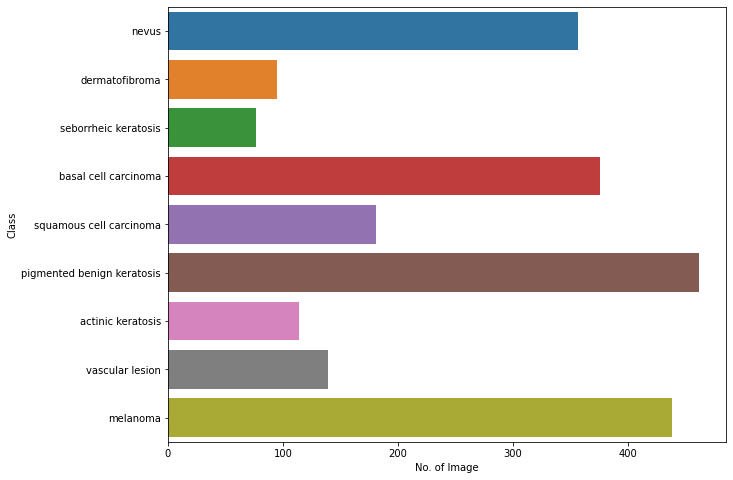

In [21]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

 #### - seborrheic keratosis class has the least number of samples.
#### - pigmented benign keratosis dominate the data in terms proportionate number of samples



#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [22]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [23]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1EA56BE760>: 100%|██████████| 500/500 [00:24<00:00, 20.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1EAC061070>: 100%|██████████| 500/500 [00:24<00:00, 20.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1EAC037310>: 100%|██████████| 500/500 [00:21<00:00, 23.02 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F1EBAEC1A30>: 100%|██████████| 500/500 [01:42<00:00,  4.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F1EBB462E20>: 100%|██████████| 500/500 [01:41<00:00,  4.95 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1EBAEA45B0>: 100%|██████████| 500/500 [00:19<00:00, 26.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1EA67C3370>: 100%|██████████| 500/500 [00:47<00:00, 10.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1EBB3D6FD0>: 100%|██████████| 500/500 [00:19<00:00, 26.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1EBAEC11F0>: 100%|██████████| 500/500 [00:19<00:00, 25.16 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [24]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [25]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000329.jpg_ba574432-2279-49fa-b3f8-024a8a20c34d.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000329.jpg_e5bd5c5a-7c8a-4eb5-bbc1-25223a88399c.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000486.jpg_5ded22b9-f435-4c82-87c8-f76950790223.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000261.jpg_22cfc409-1404-405c-b2d9-27572411b772.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000383.jpg_5afe6fe0-8624-4a7b-b326-506e6cab83b8.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000032.jpg_03c670ff-6e2c-4072-a410-54b078f85569.jpg'

In [26]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [27]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [28]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,nevus
1,/content/Skin cancer ISIC The International Sk...,nevus
2,/content/Skin cancer ISIC The International Sk...,nevus
3,/content/Skin cancer ISIC The International Sk...,nevus
4,/content/Skin cancer ISIC The International Sk...,nevus


In [29]:
df2['Label'].value_counts()

nevus                         500
dermatofibroma                500
seborrheic keratosis          500
basal cell carcinoma          500
squamous cell carcinoma       500
pigmented benign keratosis    500
actinic keratosis             500
vascular lesion               500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [30]:
batch_size = 32
img_height = 180
img_width = 180

####  Create a training dataset

In [31]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


####  Create a validation dataset

In [32]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [33]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

####  Create your model (make sure to include normalization)

In [34]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

# Increse the model size by adding another 32 layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 64 layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

# adding another 128 layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))

# Max Pool size of 2*2
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512,kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 88, 88, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 86, 86, 64)        18496     
                                                      

####  Compile your model (Choose optimizer and loss function appropriately)

In [35]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

####  Train your model

In [36]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/50
169/169 [==============================] - 47s 134ms/step - loss: 2.8495 - accuracy: 0.1693 - val_loss: 2.1262 - val_accuracy: 0.2116
Epoch 2/50
169/169 [==============================] - 18s 105ms/step - loss: 1.9895 - accuracy: 0.2704 - val_loss: 1.8433 - val_accuracy: 0.3207
Epoch 3/50
169/169 [==============================] - 18s 106ms/step - loss: 1.8228 - accuracy: 0.3288 - val_loss: 1.7976 - val_accuracy: 0.3489
Epoch 4/50
169/169 [==============================] - 18s 109ms/step - loss: 1.7222 - accuracy: 0.3591 - val_loss: 1.7704 - val_accuracy: 0.3289
Epoch 5/50
169/169 [==============================] - 18s 105ms/step - loss: 1.6704 - accuracy: 0.3796 - val_loss: 1.6265 - val_accuracy: 0.4068
Epoch 6/50
169/169 [==============================] - 18s 109ms/step - loss: 1.6528 - accuracy: 0.3982 - val_loss: 1.6105 - val_accuracy: 0.4091
Epoch 7/50
169/169 [==============================] - 18s 105ms/step - loss: 1.7054 - accuracy: 0.4114 - val_loss: 1.9892 - val_ac

####   Visualize the model results

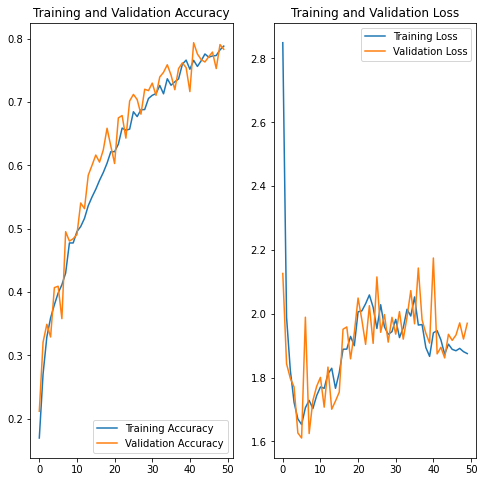

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### As can be seen, model is not overfitting/underfitting and is performing really well after treating class imbalance

## Model Prediction

1/1 [==============================] - 0s 40ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


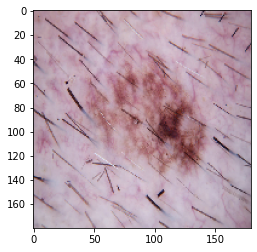

In [44]:
Test_image_path = os.path.join(data_dir_test, class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )